In [1]:
from pathlib import Path

from data_utils import load_params, load_results, get_sample_based_scores
from eval import calculate_cf_matrix, plot_cf_matrix, plot_ovr_frr_dr, get_y_true_and_y_pred_for_cf_matrix, get_y_true_roc_for_roc_curve
import yaml
import pandas as pd

# Load data

In [2]:
# import parameters
params_path = Path('./params_C31_binary.yml')
import_params = load_params(params_path, 'import_params')
export_params = load_params(params_path, 'export_params')

# import results.txt file and extract information from file names 
df_results_image_based = load_results(import_params.import_file_path, import_params)
df_results_image_based

,image_name,category,sample,revolution,trigger,truth,bad,good
0,/data/test/bad/sprung_heel_bad_SprungHeel_Bode...,sprung_heel,11,5,4,bad,1.000000e+00,3.195748e-12
1,/data/test/good/sprung_heel_good_SprungHeel_Bo...,sprung_heel,23,4,1,good,2.625044e-06,9.999974e-01
2,/data/test/good/sprung_heel_good_SprungHeel_Bo...,sprung_heel,13,6,3,good,5.958009e-08,1.000000e+00
3,/data/test/good/sprung_heel_good_SprungHeel_Bo...,sprung_heel,13,5,8,good,1.482302e-08,1.000000e+00
4,/data/test/bad/sprung_heel_bad_SprungHeel_Bode...,sprung_heel,30,2,4,bad,4.048706e-01,5.951294e-01
...,...,...,...,...,...,...,...,...
307,/data/test/bad/sprung_heel_bad_SprungHeel_Bode...,sprung_heel,13,5,5,bad,3.497690e-03,9.965023e-01
308,/data/test/good/sprung_heel_good_SprungHeel_Bo...,sprung_heel,13,4,3,good,2.010392e-07,9.999998e-01
309,/data/test/bad/sprung_heel_bad_SprungHeel_Bode...,sprung_heel,22,5,5,bad,9.999453e-01,5.468984e-05
310,/data/test/good/sprung_heel_good_SprungHeel_Bo...,sprung_heel,13,2,7,good,7.266841e-07,9.999993e-01


# Filter categories and save data frame

In [3]:
# # filter relevant categories
# include_categories = [
#     'Airline',
#     'Verformt',
#     'BeschStopfen_',
#     'MarkStopfen_',
#     'PartikelIglo_',
#     'FaserStopfen',
#     'LyoStopfen',
#     'Gut'
# ]
# df_results_image_based = df_results_image_based[df_results_image_based.category.isin(include_categories)]

# save new data frame to csv file
export_path = Path(export_params.export_path)
path_image_based_csv = export_path / 'image_based_scores.csv'
df_results_image_based.to_csv(path_image_based_csv)

# Image-based evaluation

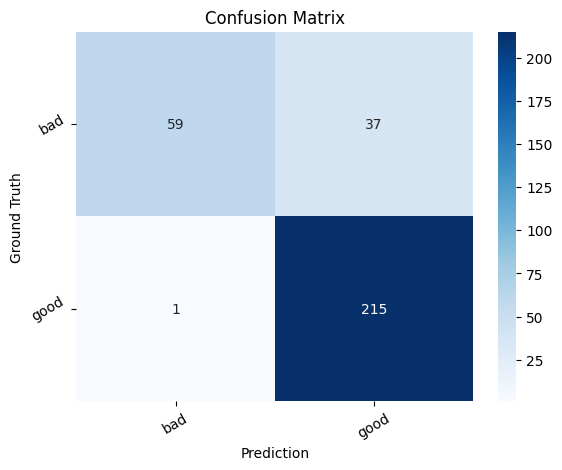

In [4]:
# Calculate prediction array (= y_pred). Prediction is the highest class score.
scores = df_results_image_based[import_params.model_classes]
truth = df_results_image_based.truth
y_true, y_pred = get_y_true_and_y_pred_for_cf_matrix(scores, truth, import_params)

# creating confusion matrix
cf_matrix = calculate_cf_matrix(y_true, y_pred, import_params)

# plotting and saving confusion matrix
save_path_cf_matrix = export_path / 'image_based_cf_matrix.png'
plot_cf_matrix(cf_matrix, save_path_cf_matrix, import_params.model_classes)

<Figure size 640x480 with 0 Axes>

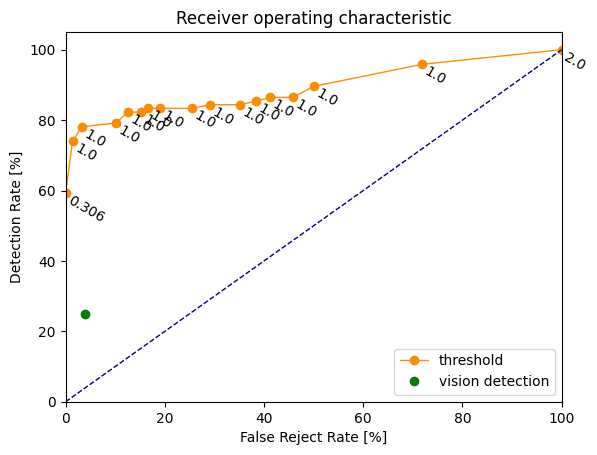

In [5]:
# converting truth to binary and calculate maximum negative score for ROC curve
y_good_score = df_results_image_based[import_params.positive_class]
y_true_roc = get_y_true_roc_for_roc_curve(df_results_image_based.truth, import_params)

# plotting and saving ROC curve
save_path_ROC_curve = export_path / 'image_based_ROC_curve.png'
benchmark = import_params.benchmark
plot_ovr_frr_dr(y_true_roc, y_good_score, save_path_ROC_curve, n = 3, pos_label=import_params.pos_label, benchmark=benchmark)


# Sample-based evaluation

In [6]:
# df_results_sample_based = get_sample_based_scores(df_results_image_based, import_params)
df_results_sample_based = get_sample_based_scores(df_results_image_based, import_params)
df_results_sample_based

,category,sample,revolution,image_name,trigger,truth,bad,good,sample_truth
0,sprung_heel,5,1,/data/test/bad/sprung_heel_bad_SprungHeel_Bode...,4,bad,5.812836e-07,9.999994e-01,bad
1,sprung_heel,5,2,/data/test/bad/sprung_heel_bad_SprungHeel_Bode...,7,bad,1.089211e-07,9.999999e-01,bad
2,sprung_heel,5,4,/data/test/bad/sprung_heel_bad_SprungHeel_Bode...,3,bad,1.713449e-06,9.999983e-01,bad
3,sprung_heel,5,5,/data/test/bad/sprung_heel_bad_SprungHeel_Bode...,6,bad,1.964245e-07,9.999998e-01,bad
4,sprung_heel,5,6,/data/test/bad/sprung_heel_bad_SprungHeel_Bode...,9,bad,8.953552e-06,9.999911e-01,bad
...,...,...,...,...,...,...,...,...,...
57,sprung_heel,30,3,/data/test/bad/sprung_heel_bad_SprungHeel_Bode...,2,bad,1.000000e+00,3.624067e-09,bad
58,sprung_heel,30,4,/data/test/bad/sprung_heel_bad_SprungHeel_Bode...,9,bad,1.000000e+00,1.517625e-11,bad
59,sprung_heel,30,5,/data/test/bad/sprung_heel_bad_SprungHeel_Bode...,7,bad,1.000000e+00,1.360575e-10,bad
60,sprung_heel,30,6,/data/test/bad/sprung_heel_bad_SprungHeel_Bode...,8,bad,1.000000e+00,4.772715e-12,bad


In [16]:
df_results_sample_based[import_params.model_classes].head().agg(lambda x: x.idxmax(), axis=1)

0    good
1    good
2    good
3    good
4    good
dtype: object

In [7]:
# save sample based data frame to csv file
save_path_sample_based_csv= export_path / 'sample_based_test_scores.csv'
df_results_sample_based.to_csv(save_path_sample_based_csv)

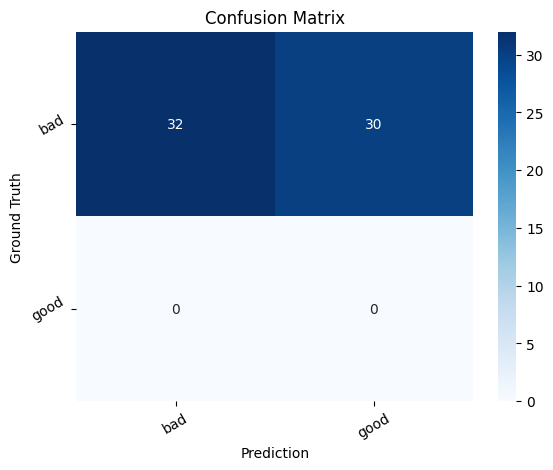

In [8]:
scores = df_results_sample_based[import_params.model_classes]
sample_truths = df_results_sample_based['sample_truth']
y_true, y_pred = get_y_true_and_y_pred_for_cf_matrix(scores, sample_truths, import_params)
cf_matrix = calculate_cf_matrix(y_true, y_pred, import_params)

# plotting and saving confusion matrix
save_path_cf_matrix = export_path / 'sample_based_cf_matrix.png'
plot_cf_matrix(cf_matrix, save_path_cf_matrix, import_params.model_classes)

c:\Users\1699\VirtualEnv\tony\lib\site-packages\sklearn\metrics\_ranking.py:1018: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


<Figure size 640x480 with 0 Axes>

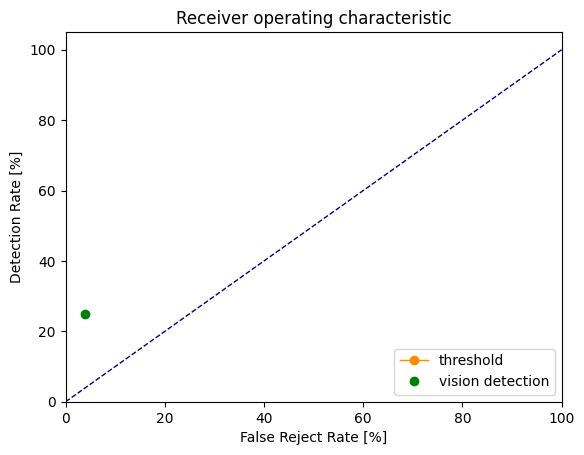

In [10]:
# converting truth to binary and calculate maximum negative score for ROC curve
y_good_score = df_results_sample_based[import_params.positive_class]
y_true_roc = get_y_true_roc_for_roc_curve(df_results_sample_based.sample_truth, import_params)

# plotting and saving ROC curve
save_path_ROC_curve = export_path / 'sample_based_ROC_curve.png'
benchmark = import_params.benchmark
plot_ovr_frr_dr(y_true_roc, y_good_score, save_path_ROC_curve, n = 1, pos_label=import_params.pos_label, benchmark=benchmark)